Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

1.It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger

2.When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"

3.If you add any additional variables, make sure you use the same names as the ones used in the class

In [0]:
import tensorflow as tf
from tensorflow import keras



In [0]:
mnist_handwriting = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_handwriting.load_data()

11493376/11490434 [==============================] - 0s 0us/step


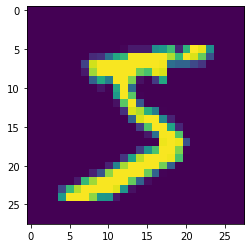

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
x_train= x_train/255.0
y_train= y_train/255.0

print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [0]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [0]:
print(len(x_train[0]))
flag1=x_train[0]
print(flag1.shape)

28
(28, 28)


# Neural network definition

In [0]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('acc')>0.99):
      print("Reached 99% accuracy so cancelling training!")
      self.model.stop_training = True

model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                keras.layers.Dense(units= 512, activation= tf.nn.relu),
                                keras.layers.Dense(units= 512, activation= tf.nn.relu),
                                keras.layers.Dense(units=10, activation= tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callbacks = MyCallback()
model.fit(x_train,y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0198 - acc: 0.0987
Epoch 2/10
49248/60000 [=======================>......] - ETA: 2s - loss: 1.0762e-07 - acc: 0.0990

KeyboardInterrupt: ignored

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0506 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 7.3184e-05 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 1.8050e-05 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 5.7596e-06 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 1.9958e-06 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 7.3385e-07 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 2.2064e-07 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 7s 112us/sample - loss: 3.0414e-08 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0000e+00 - acc: 0.0987
Epoch 10/10
60000/

In [0]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 134307.6399 - acc: 0.0980


[134307.639925, 0.098]